In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
mae["student ratio"] = (mae["Evals Made"]/mae["Enroll"]) *100

C:\Users\TonyY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
mae.head()

,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,student ratio
2728,MAE,MAE 1,"Bahadori, Mohammad Yousef",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2729,MAE,MAE 1,"Linden, Paul F.",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2730,MAE,MAE 1,"Nagy, Geza",FA07,213,119,63.2,79.3,3.96,3.27,2.87,55.868545
2731,MAE,MAE 101A,"Bahadori, Mohammad Yousef",FA14,55,25,96.0,96.0,6.42,3.13,2.36,45.454545
2732,MAE,MAE 101A,"Bahadori, Mohammad Yousef",S112,50,13,92.3,84.6,9.58,3.23,2.69,26.000000


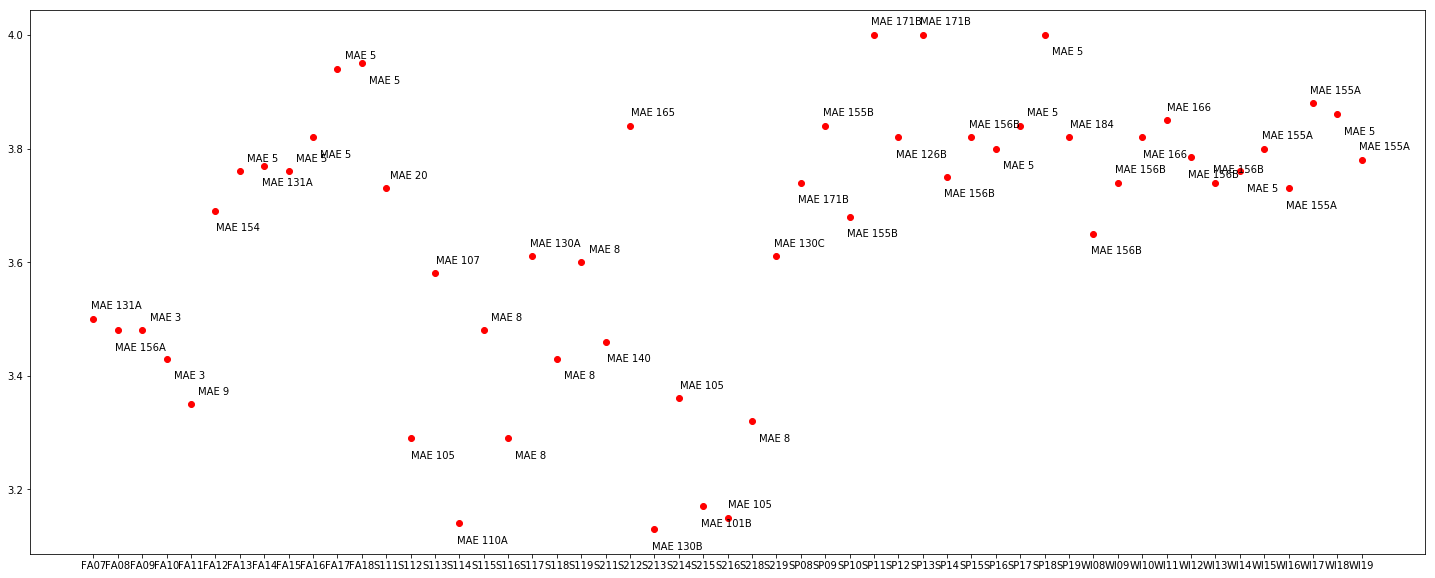

In [9]:
mae_term = mae.groupby(by='Term')
x_label = []
y_grade = []
y_course = []
for quarter, table1 in mae_term:
    x_label.append(quarter)  #
    selected = table1.groupby(["Course Number"])
    study_over_course = selected.agg({"Avg Grade Received": "mean"}).nlargest(1, "Avg Grade Received")
    course_number = study_over_course.index[0]
    y_course.append(course_number)
    y_grade.append(study_over_course.loc[course_number]["Avg Grade Received"])

plt.figure(figsize=(25,10))  # figure size
plt.plot(x_label, y_grade, 'or')  # xlabel: term, ylabel: highest grade
a = 1  # each point label offset
for x,y in zip(range(1,len(x_label) + 1), y_grade):
    label = y_course[int(x) - 1]
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10*a), # distance from text to points (x,y)
                 ha='center')
    a *= -1
    if a < 0:  # below point text need to be lower
        a *= 2
    if a > 0:  # above point text remain the same
        a /= 2
plt.show()